# Relatório de Análise VII

In [1]:
import pandas as pd

dados = pd.read_csv("dados/residencias.csv", sep=";")

In [2]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m^2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [3]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']

In [4]:
selecao = dados["Bairro"].isin(bairros)
dados = dados[selecao]
dados["Bairro"].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
12           Botafogo
16             Tijuca
20             Leblon
21            Ipanema
80           Flamengo
Name: Bairro, dtype: object

In [5]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por m^2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22293,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,Apartamento
22294,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento
22295,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,35.71,Apartamento
22297,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,Casa


In [6]:
grupo_bairros = dados.groupby("Bairro")
print(grupo_bairros)

In [7]:
for item, dados in grupo_bairros:
    print("{} -> {}".format(item, dados["Valor"].mean()))

Barra da Tijuca -> 6975.944599038705
Botafogo -> 8522.794535519126
Copacabana -> 4102.782994454714
Flamengo -> 4109.81589958159
Ipanema -> 9186.321989528797
Leblon -> 8588.069696969696
Tijuca -> 2043.52


In [8]:
grupo_bairros[["Valor", "Condominio"]].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,6975.94,3544.21
Botafogo,8522.79,981.77
Copacabana,4102.78,1155.30
Flamengo,4109.82,1101.63
Ipanema,9186.32,2288.05
Leblon,8588.07,2092.05
Tijuca,2043.52,711.69


In [9]:
grupo_bairros["Valor"].describe()

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3953.0,6975.944599,11756.678963,800.0,2500.0,4499.0,8500.0,600000.0
Botafogo,915.0,8522.794536,148669.419958,700.0,2200.0,3000.0,4310.0,4500000.0
Copacabana,2705.0,4102.782994,3578.846957,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,717.0,4109.815900,3831.592562,800.0,1900.0,2900.0,4900.0,35000.0
Ipanema,1910.0,9186.321990,7975.839564,1200.0,4462.5,7000.0,10500.0,90000.0
Leblon,1320.0,8588.069697,6880.922795,100.0,4500.0,6800.0,10000.0,100000.0
Tijuca,1100.0,2043.520000,1664.337667,750.0,1500.0,1800.0,2300.0,45000.0


In [10]:
grupo_bairros["Valor"].aggregate(["max", "min", "sum"]).rename( columns=
    {"max": "Máximo", "min": "Mínimo", "sum": "Soma"})

,Máximo,Mínimo,Soma
Bairro,,,
Barra da Tijuca,600000.0,800.0,27575909.0
Botafogo,4500000.0,700.0,7798357.0
Copacabana,35000.0,100.0,11098028.0
Flamengo,35000.0,800.0,2946738.0
Ipanema,90000.0,1200.0,17545875.0
Leblon,100000.0,100.0,11336252.0
Tijuca,45000.0,750.0,2247872.0


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
plt.rc("figure", figsize=(20, 10))

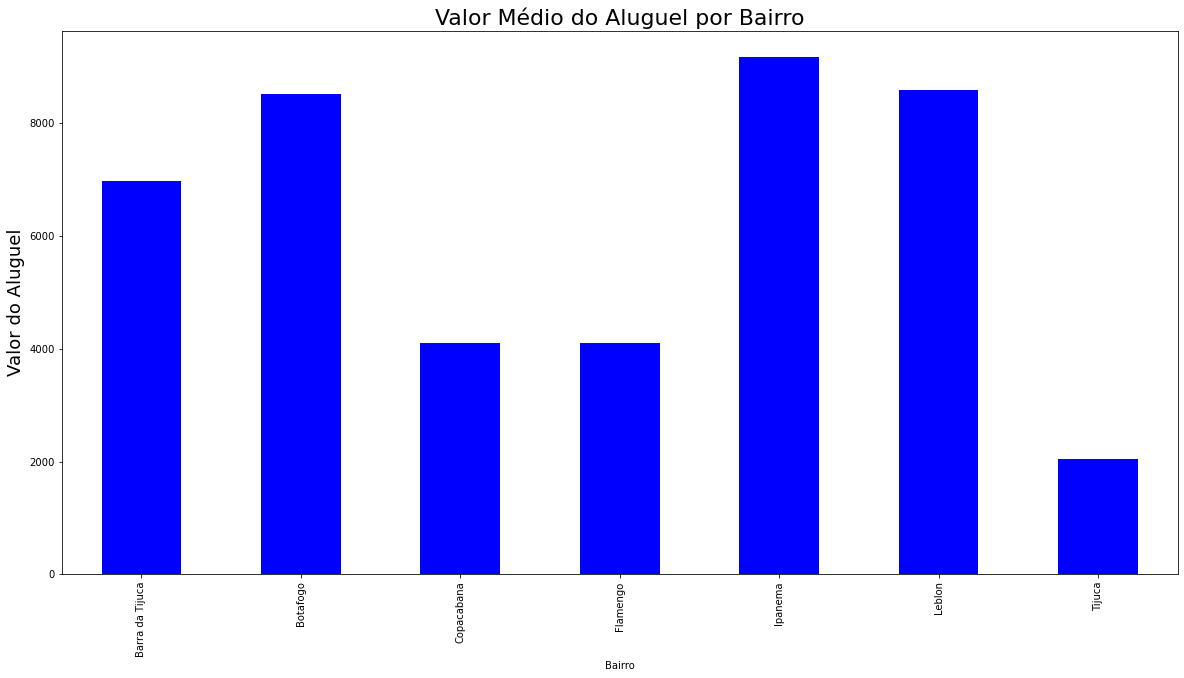

In [13]:
fig = grupo_bairros["Valor"].mean().plot.bar(color="blue")
fig.set_ylabel("Valor do Aluguel", {"fontsize": 18})
fig.set_title("Valor Médio do Aluguel por Bairro", {"fontsize": 22});